In [26]:
import re

for weight_sym, val in zip(best.alphas, best.W):
  weight = re.sub(r'a_o(\d)__0(\d)__0(\d)', r'\alpha_{o_\1}^{(\2, \3)}', weight_sym.name).replace('\x07', '\\a')
  print(f'${weight}$ & ', end='')
  val = round(float(val), 4)
  print(f'${val}$ \\\\')

$\alpha_{o_2}^{(0, 1)}$ & $0.0251$ \\
$\alpha_{o_4}^{(0, 2)}$ & $0.1166$ \\
$\alpha_{o_0}^{(0, 3)}$ & $0.054$ \\
$\alpha_{o_2}^{(0, 3)}$ & $0.1099$ \\
$\alpha_{o_5}^{(0, 3)}$ & $0.1879$ \\
$\alpha_{o_6}^{(0, 3)}$ & $0.56$ \\
$\alpha_{o_0}^{(1, 2)}$ & $0.1274$ \\
$\alpha_{o_1}^{(1, 2)}$ & $0.111$ \\
$\alpha_{o_2}^{(1, 2)}$ & $0.1266$ \\
$\alpha_{o_3}^{(1, 2)}$ & $0.1104$ \\
$\alpha_{o_4}^{(1, 2)}$ & $0.1291$ \\
$\alpha_{o_5}^{(1, 2)}$ & $0.1276$ \\
$\alpha_{o_6}^{(1, 2)}$ & $0.1275$ \\
$\alpha_{o_7}^{(1, 2)}$ & $0.1098$ \\
$\alpha_{o_0}^{(1, 3)}$ & $0.1694$ \\
$\alpha_{o_1}^{(1, 3)}$ & $0.0357$ \\
$\alpha_{o_2}^{(1, 3)}$ & $0.1734$ \\
$\alpha_{o_3}^{(1, 3)}$ & $0.0339$ \\
$\alpha_{o_4}^{(1, 3)}$ & $0.1646$ \\
$\alpha_{o_5}^{(1, 3)}$ & $0.1719$ \\
$\alpha_{o_6}^{(1, 3)}$ & $0.1699$ \\
$\alpha_{o_7}^{(1, 3)}$ & $0.0336$ \\
$\alpha_{o_0}^{(2, 3)}$ & $0.1837$ \\
$\alpha_{o_1}^{(2, 3)}$ & $0.0495$ \\
$\alpha_{o_2}^{(2, 3)}$ & $0.1411$ \\
$\alpha_{o_3}^{(2, 3)}$ & $0.0107$ \\
$\alpha_{o_4}^{(

In [27]:
float(best.loss)

1.1082913875579834

In [28]:
# y_prediction_last = model_y.subs(zip(network.alphas, W))
# y_prediction_last

In [29]:
y_prediction_best = best.model_y.subs(zip(best.alphas, best.W))
y_prediction_best

0.559994582601684*x**4 + 0.187962920599667*x**2 + 0.11935839572503*x + 0.000368218560399693*(2.29131403768922e-7*x**4 + 0.000363628759623082*x**2 - 0.514262143846239*x + 0.496010043484023*exp(0.0251127295196056*x) + 1)**4 + 0.00772696445404676*(2.29131403768922e-7*x**4 + 0.000363628759623082*x**2 - 0.514262143846239*x + 0.496010043484023*exp(0.0251127295196056*x) + 1)**2 + 0.025510901320589*exp(0.0251127295196056*x) + 0.0102351206552118*exp(5.07225176280998e-8*x**4 + 8.04960204785666e-5*x**2 - 0.113841534716086*x + 0.109801091253757*exp(0.0251127295196056*x)) - 0.0378412777270404

In [37]:
sp.latex(y_prediction_best)

'0.559994582601684 x^{4} + 0.187962920599667 x^{2} + 0.11935839572503 x + 0.000368218560399693 \\left(2.29131403768922 \\cdot 10^{-7} x^{4} + 0.000363628759623082 x^{2} - 0.514262143846239 x + 0.496010043484023 e^{0.0251127295196056 x} + 1\\right)^{4} + 0.00772696445404676 \\left(2.29131403768922 \\cdot 10^{-7} x^{4} + 0.000363628759623082 x^{2} - 0.514262143846239 x + 0.496010043484023 e^{0.0251127295196056 x} + 1\\right)^{2} + 0.025510901320589 e^{0.0251127295196056 x} + 0.0102351206552118 e^{5.07225176280998 \\cdot 10^{-8} x^{4} + 8.04960204785666 \\cdot 10^{-5} x^{2} - 0.113841534716086 x + 0.109801091253757 e^{0.0251127295196056 x}} - 0.0378412777270404'

In [31]:
# y_prediction_last_lambd = sp.lambdify([network.x], y_prediction_last, modules=network.lambdify_modules, cse=True)
y_prediction_best_lambd = sp.lambdify([network.x], y_prediction_best, modules=network.lambdify_modules, cse=True)

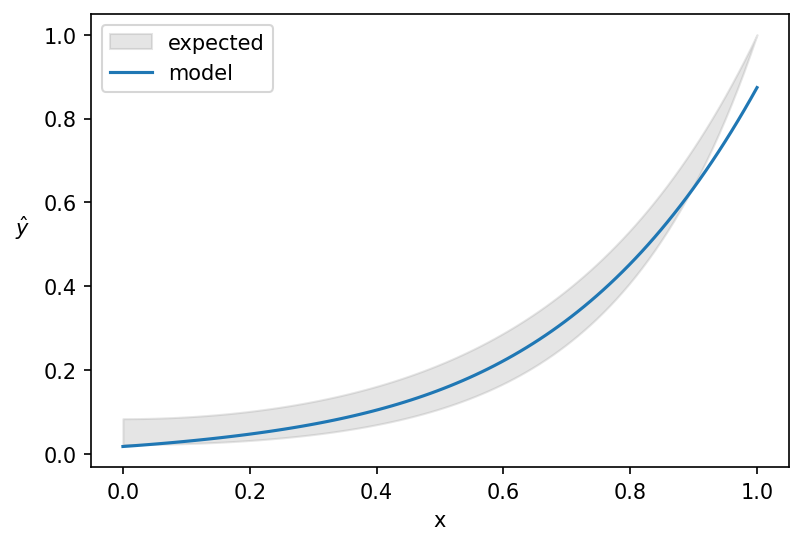

In [41]:
import matplotlib.pyplot as plt

xspace = np.linspace(*x_bounds, 100)

# plotting.show_c2varied_plot(plotting.actual_func, xspace, plotting.c2_bounds)
plotting.show_c2varied_plot(orig_func_klow, xspace, plotting.c2_bounds)
# plt.plot(xspace, y_prediction_last_lambd(xspace), color='tab:orange', label='model last')
plt.plot(xspace, y_prediction_best_lambd(xspace), color='tab:blue', label='model')
plt.legend(loc=2)
plt.gcf().set_dpi(150)
# plt.ylim((0.97, 1.02))
plt.xlabel('x')
plt.ylabel('$\hat{y}$', rotation=0, labelpad=10)
plt.show()

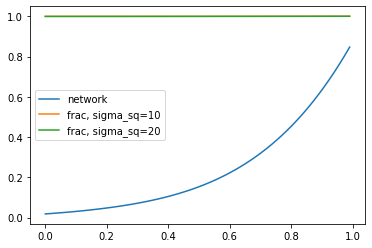

In [38]:
y_network_f = sp.lambdify(network.x, y_prediction_best)
x = np.arange(0, 1, 0.01)

y_network = y_network_f(x)
y_comp = orig_func_khi(x, 10)
y_comp2 = orig_func_khi(x, 20)

plt.plot(x, y_network, label='network')
plt.plot(x, y_comp, label='frac, sigma_sq=10')
plt.plot(x, y_comp2, label='frac, sigma_sq=20')
plt.legend()
plt.show()

In [34]:
def L2(y_pred, y_actual):
  return float(np.mean(np.square(np.array(y_pred) - np.array(y_actual))))

In [43]:
allsum = 0
for k in [1,  2,  3,  4,  5,  6,  7,  8,  9, 10]:
  val = L2(y_network_f(x), orig_func_klow(x, k))
  print(k, val+1, '- 1')
  allsum += val

allsum/10.0

1 1.2844357192516327 - 1
2 1.1528181284666061 - 1
3 1.0903427675366402 - 1
4 1.056632675230503 - 1
5 1.0368283540010452 - 1
6 1.0244859028607607 - 1
7 1.0164683070033789 - 1
8 1.011110533028841 - 1
9 1.007467260118574 - 1
10 1.0049720080569386 - 1


0.06855616555549204